PRATYUSH PRASAD


In [49]:
# IMPORTING NECESSARY FILES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics  
import seaborn as sns
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import statistics
import timeit
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
import joblib
import sys
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
# IMPORTING THE DATA

from google.colab import drive
drive.mount('/content/drive/')
df_3=pd.read_csv("/content/drive/MyDrive/PAPERS/TSF GRIP SPARKS/TASK # 3/SampleSuperstore.csv")

Mounted at /content/drive/


In [3]:
# THE DATASET

df_3

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
# COLUMNS IN THE DATA

df_3.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
# DATA DESCRIPTION

df_3.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# DATA TYPE AND NULL COUNT IN INDIVIDUAL FEATURES

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# SHAPE OF THE DATA

df_3.shape

(9994, 13)

In [8]:
# SEPERATING THE NUMERICAL AND CATEGORICAL COLUMNS

numeric_columns=['Sales','Quantity','Discount','Profit']
categorical_columns=['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']

In [9]:
# FINDING ALL UNIQUE ELEMENTS IN EACH COLUMN

for i in categorical_columns:
  print(i,":",np.unique(df_3[i]))
  print()
  print()

Ship Mode : ['First Class' 'Same Day' 'Second Class' 'Standard Class']


Segment : ['Consumer' 'Corporate' 'Home Office']


Country : ['United States']


City : ['Aberdeen' 'Abilene' 'Akron' 'Albuquerque' 'Alexandria' 'Allen'
 'Allentown' 'Altoona' 'Amarillo' 'Anaheim' 'Andover' 'Ann Arbor'
 'Antioch' 'Apopka' 'Apple Valley' 'Appleton' 'Arlington'
 'Arlington Heights' 'Arvada' 'Asheville' 'Athens' 'Atlanta'
 'Atlantic City' 'Auburn' 'Aurora' 'Austin' 'Avondale' 'Bakersfield'
 'Baltimore' 'Bangor' 'Bartlett' 'Bayonne' 'Baytown' 'Beaumont' 'Bedford'
 'Belleville' 'Bellevue' 'Bellingham' 'Bethlehem' 'Beverly' 'Billings'
 'Bloomington' 'Boca Raton' 'Boise' 'Bolingbrook' 'Bossier City'
 'Bowling Green' 'Boynton Beach' 'Bozeman' 'Brentwood' 'Bridgeton'
 'Bristol' 'Broken Arrow' 'Broomfield' 'Brownsville' 'Bryan' 'Buffalo'
 'Buffalo Grove' 'Bullhead City' 'Burbank' 'Burlington' 'Caldwell'
 'Camarillo' 'Cambridge' 'Canton' 'Carlsbad' 'Carol Stream' 'Carrollton'
 'Cary' 'Cedar Hill' 'Cedar Rapi

In [10]:
# REMOVING DUPLICATES FROM TEH DATA

print("total number of duplicate rows in the training dataset is : ",df_3.duplicated().sum())
df_3=df_3.drop_duplicates()

total number of duplicate rows in the training dataset is :  17


In [11]:
# DROPPING POSTAL CODE AS IT IS IRRELEVENT

df_3=df_3.drop(['Postal Code'],axis=1)
df_3

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


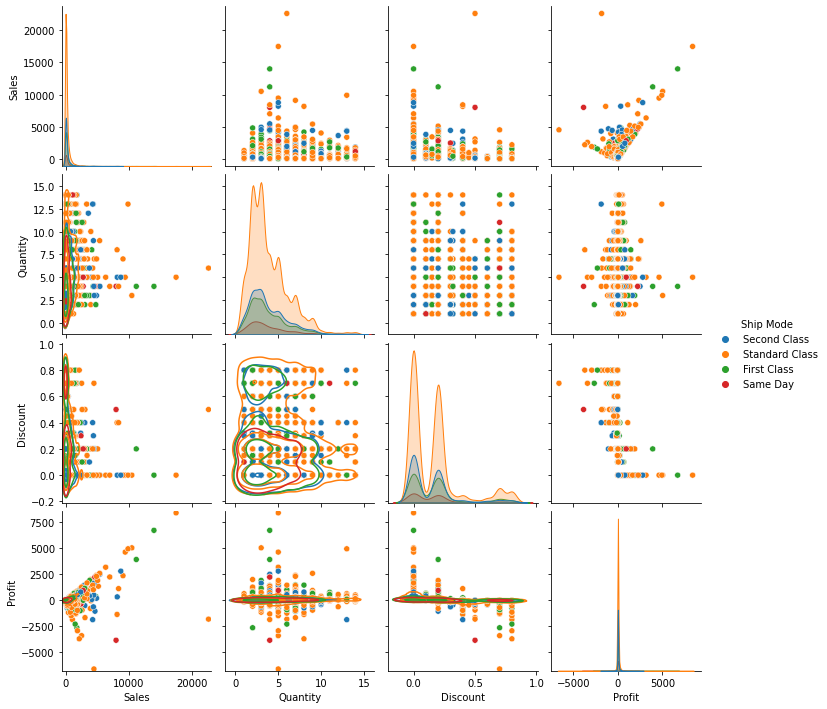

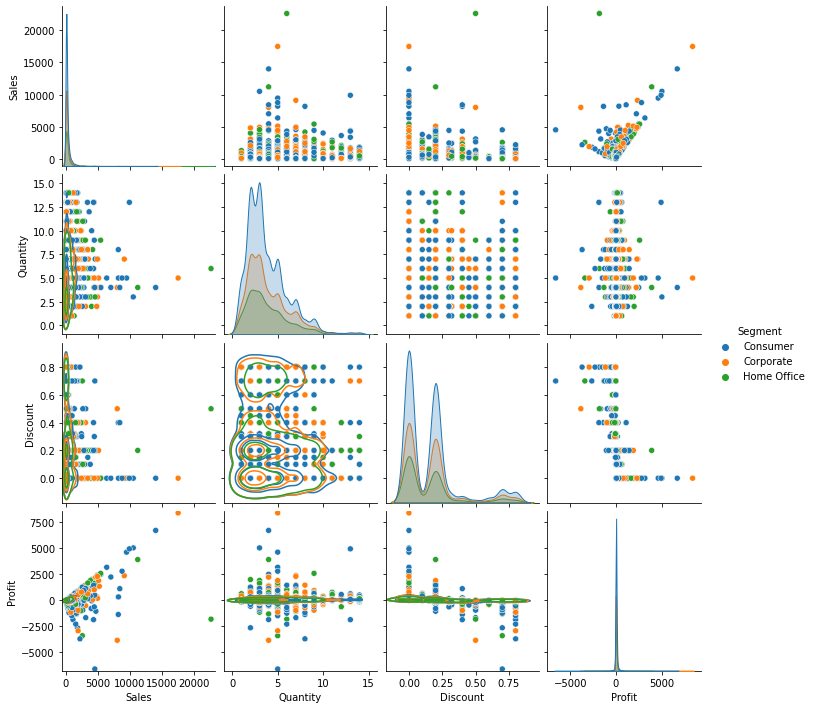

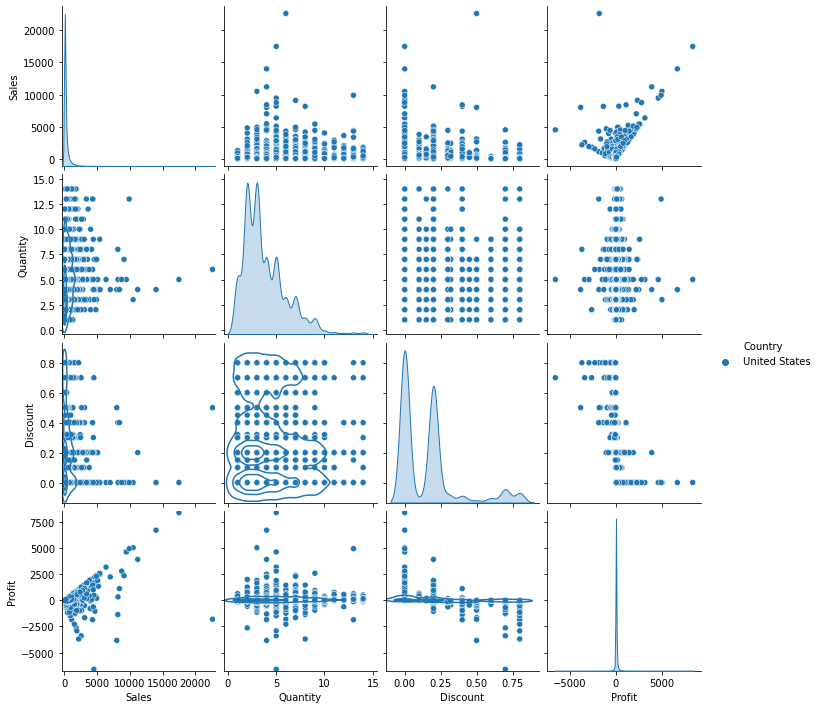

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covaria

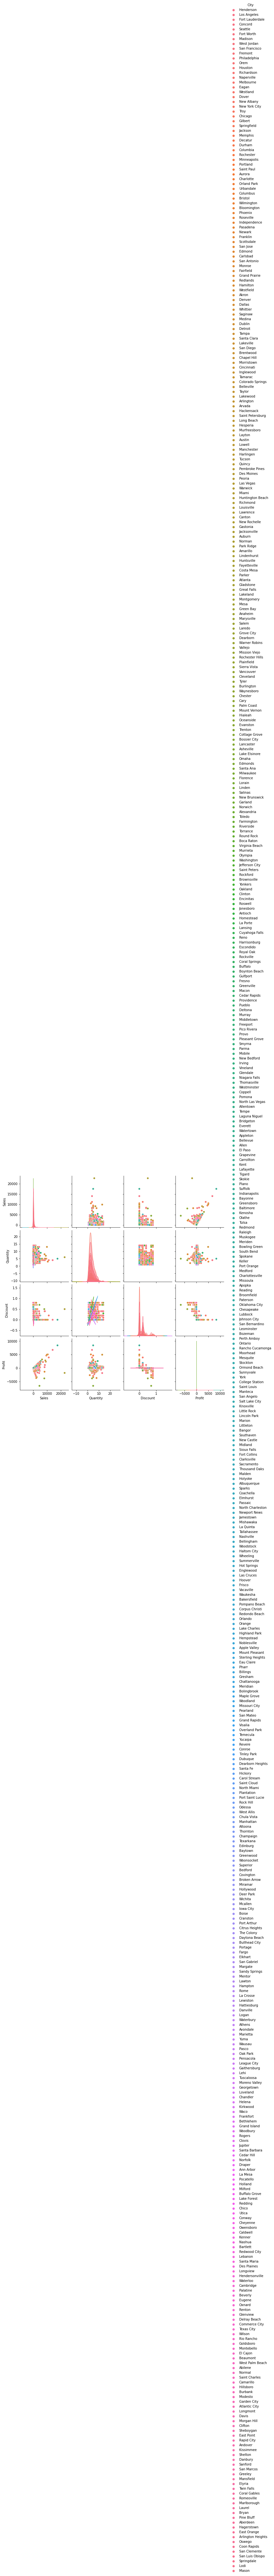

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covaria

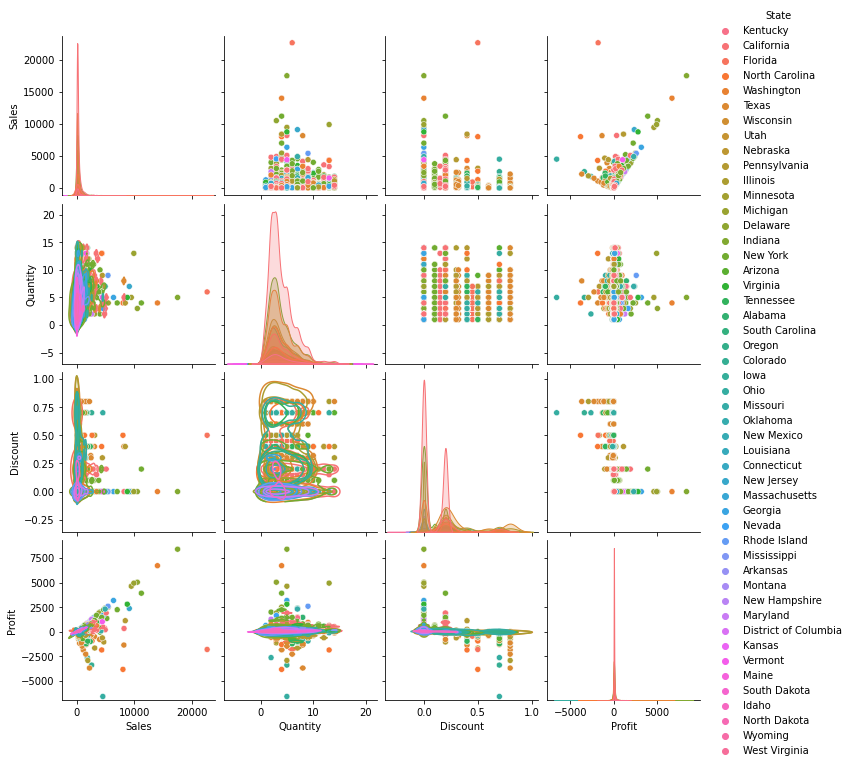

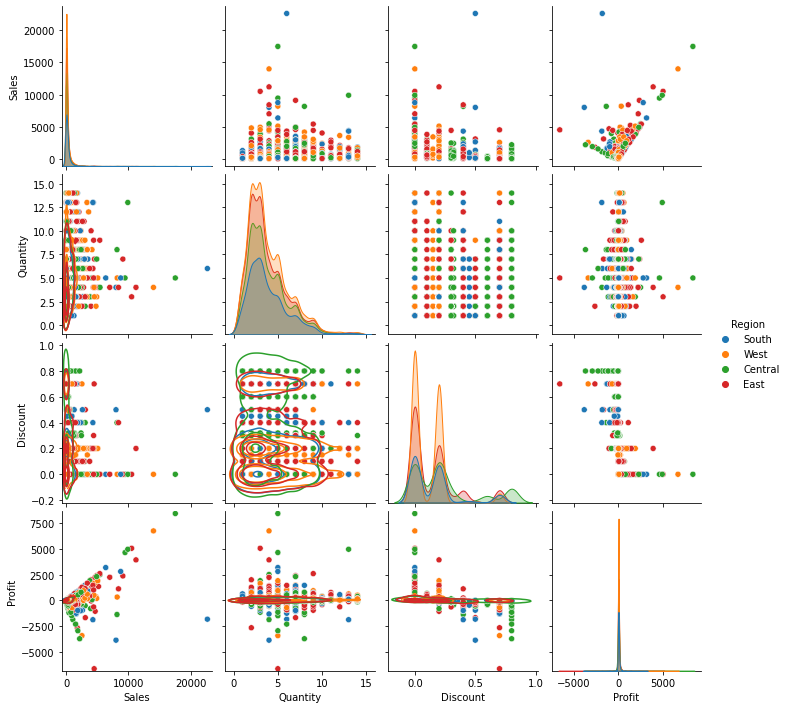

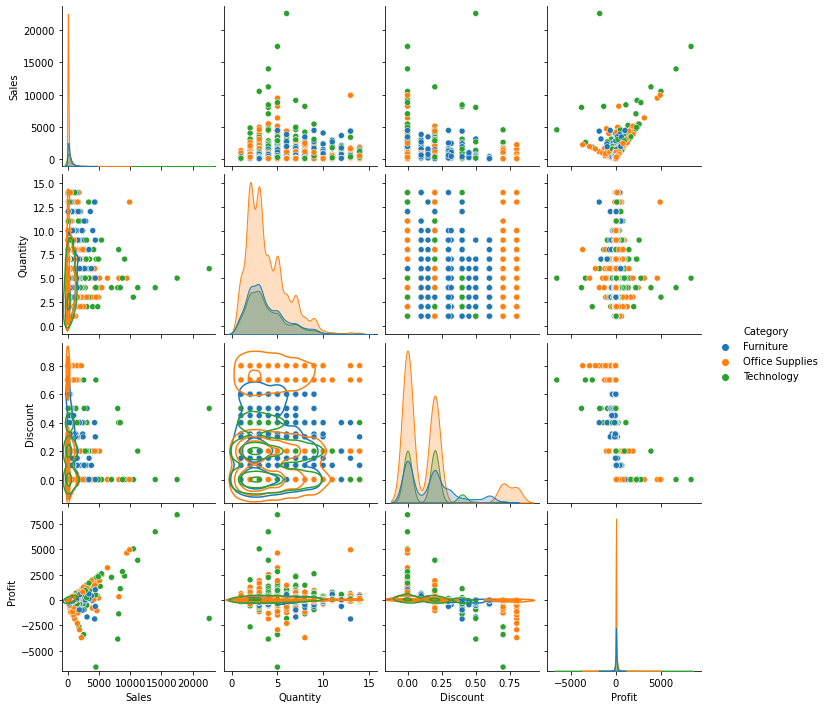

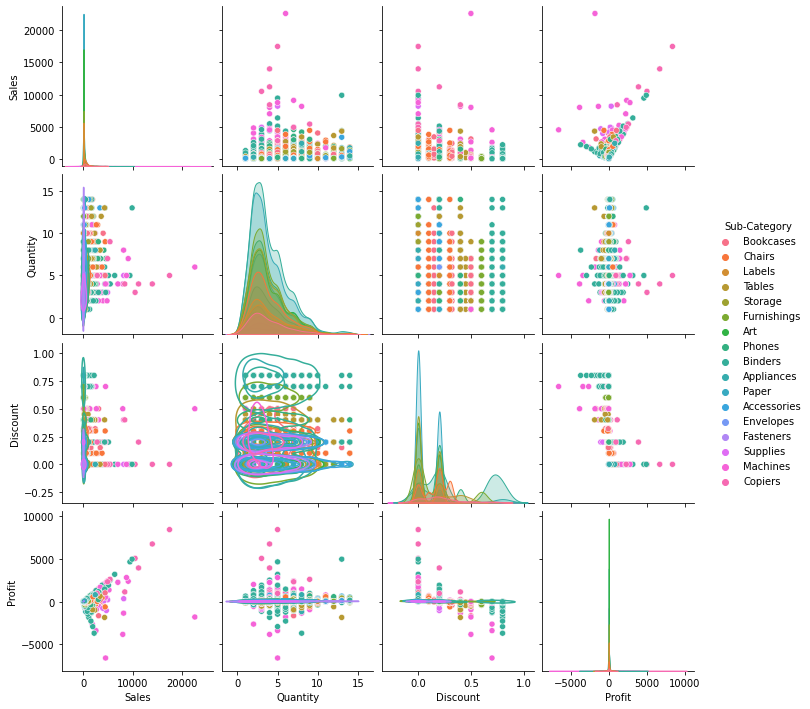

In [12]:
# SCATTER PLOT AND KDE PLOT

for i in categorical_columns:
  g=sns.pairplot(df_3,hue=i)
  g.map_lower(sns.kdeplot,levels=4,color=".2")
  print("\n")
  plt.show()

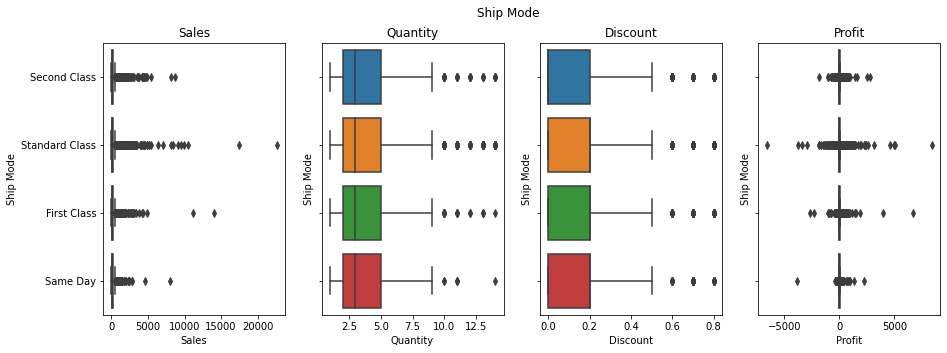

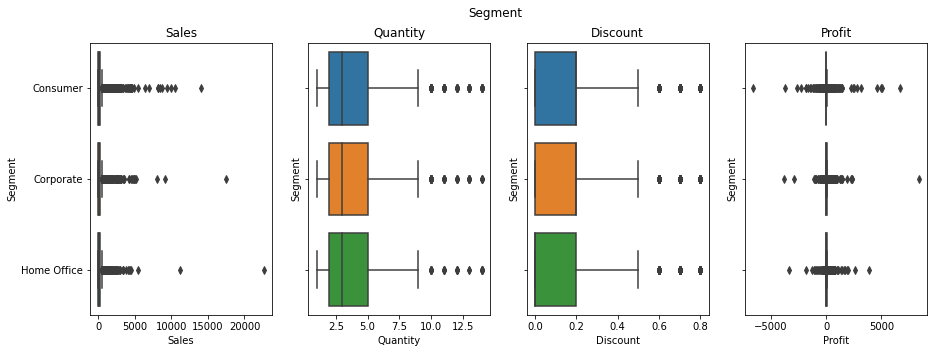

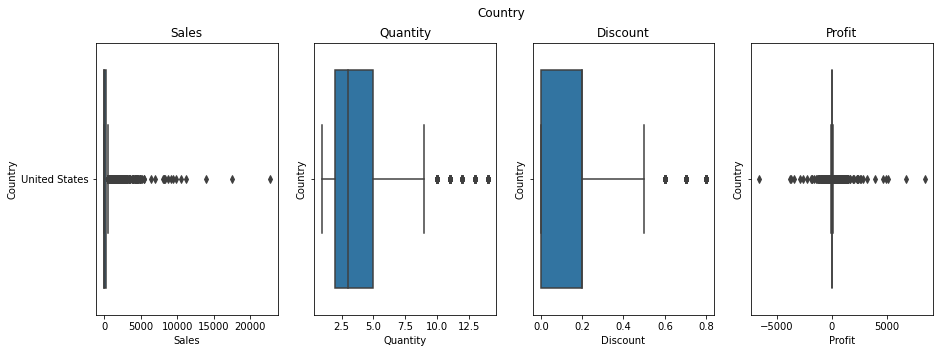

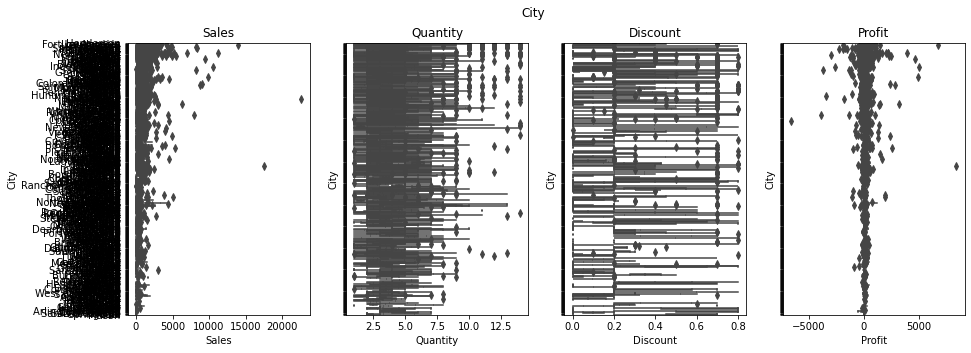

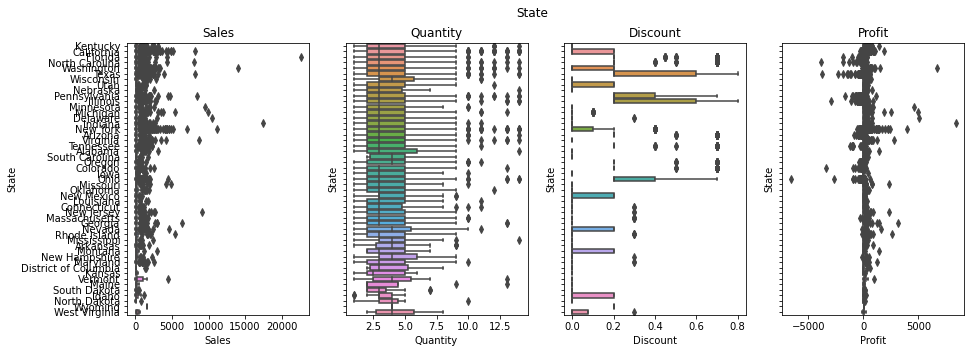

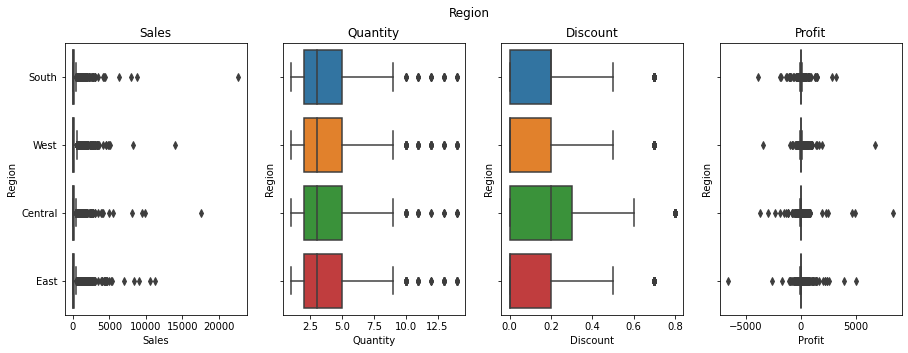

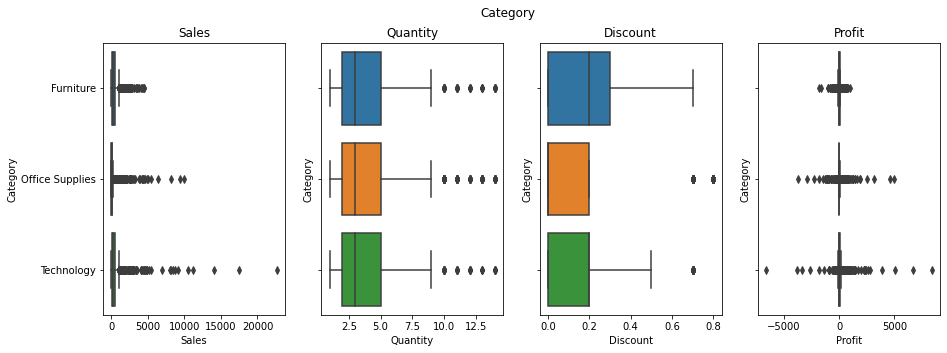

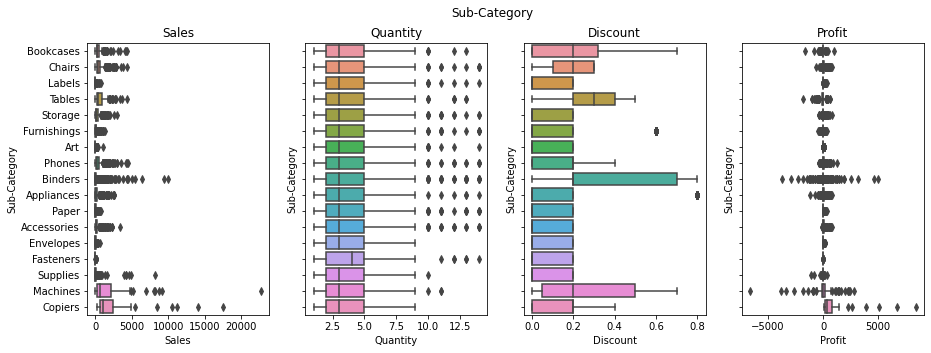

In [12]:
# BOX-PLOT OF ALL FEATURES

for j in range (0,len(categorical_columns)):
  fig, axes = plt.subplots(1,len(numeric_columns),figsize=(15,5),sharey=True)  
  fig.suptitle(categorical_columns[j])
  for i in range (0,len(numeric_columns)):
    sns.boxplot(ax=axes[i],x=numeric_columns[i],y=categorical_columns[j],data=df_3)
    axes[i].set_title(numeric_columns[i])
  plt.show()

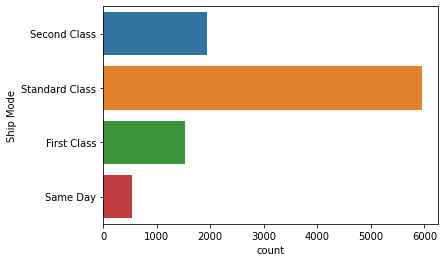

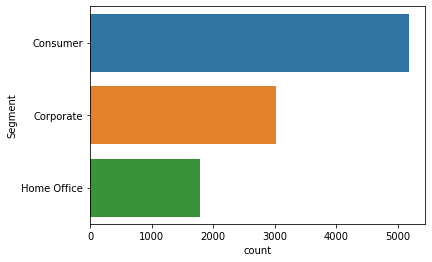

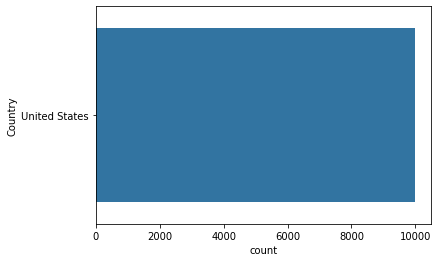

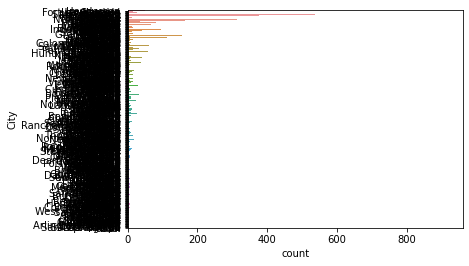

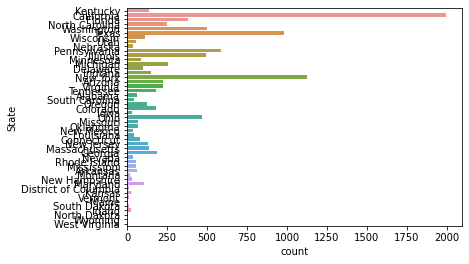

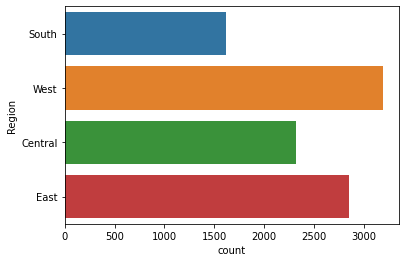

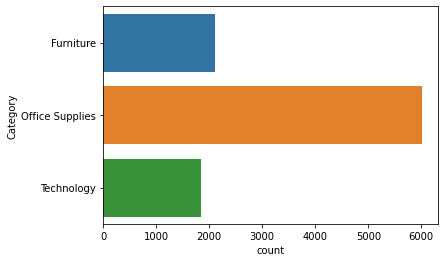

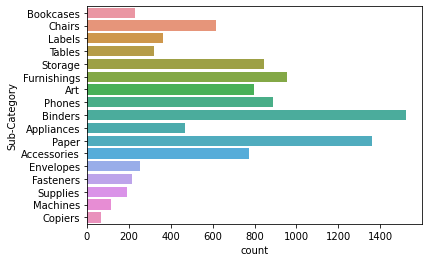

In [13]:
# COUNTPLOTS

for j in categorical_columns:
  sns.countplot(y=j,data=df_3)
  plt.show()

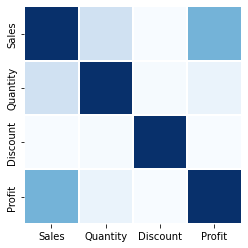

In [14]:
# COREELATION HEATMAPS

corr=df_3.corr()
sns.heatmap(corr,cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [34]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in categorical_columns:
  df_3[i]=label_encoder.fit_transform(df_3[i])
df_3

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,0,194,15,2,0,4,261.9600,2,0.00,41.9136
1,2,0,0,194,15,2,0,5,731.9400,3,0.00,219.5820
2,2,1,0,266,3,3,1,10,14.6200,2,0.00,6.8714
3,3,0,0,153,8,2,0,16,957.5775,5,0.45,-383.0310
4,3,0,0,153,8,2,1,14,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2,0,0,295,8,2,0,9,25.2480,3,0.20,4.1028
9990,3,0,0,104,3,3,0,9,91.9600,2,0.00,15.6332
9991,3,0,0,104,3,3,2,13,258.5760,2,0.20,19.3932
9992,3,0,0,104,3,3,1,12,29.6000,4,0.00,13.3200


In [35]:
# INPUT OUTPUT SPLIT AND TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

input_data=df_3.drop(['Profit'],axis=1)
output_data=df_3['Profit']

# TRAIN TEST SPLIT

x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(input_data,output_data)
print(np.shape(x_train_1),np.shape(x_test_1),np.shape(y_train_1),np.shape(y_test_1))

(7482, 11) (2495, 11) (7482,) (2495,)


LinearRegression()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-03-21 11:20:44] Features: 1/11 -- score: 0.12139901941855018[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2023-03-21 11:20:44] Features: 2/11 -- score: 0.1612012683543894[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-03-21 11:20:45] Features: 3/11 -- score: 0.1695467783069059[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 






11
1     0.121399
2     0.161201
3     0.169547
4     0.171773
5     0.172644
6     0.172647
7     0.172647
8     0.172388
9     0.171983
10     0.17117
11    0.167977
Name: avg_score, dtype: object


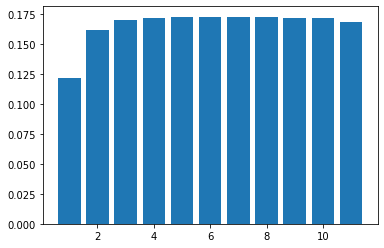

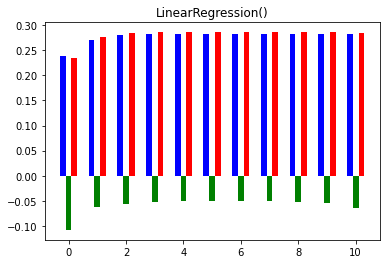

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
BayesianRidge()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-03-21 11:20:46] Features: 1/11 -- score: 0.12150294351546136[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2023-03-21 11:20:46] Features: 2/11 -- score: 0.1462503248014083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-03-21 11:20:47] Features: 3/11 -- score: 0.16967772144655857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done






11
1     0.121503
2      0.14625
3     0.169678
4     0.171946
5     0.172824
6     0.172859
7     0.172859
8     0.172633
9     0.172238
10    0.171462
11    0.168277
Name: avg_score, dtype: object


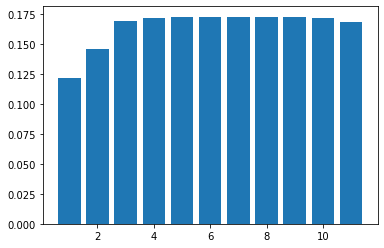

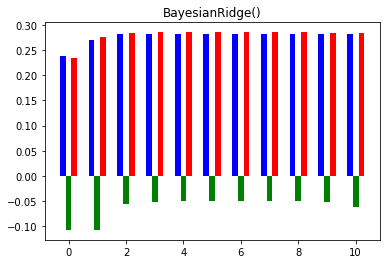

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
Lasso()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-03-21 11:20:48] Features: 1/11 -- score: 0.121401188213579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2023-03-21 11:20:48] Features: 2/11 -- score: 0.16191734931808674[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-03-21 11:20:49] Features: 3/11 -- score: 0.1702338092043394[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  






11
1     0.121401
2     0.161917
3     0.170234
4     0.172536
5     0.173026
6     0.173026
7     0.173023
8     0.172918
9     0.172514
10     0.17208
11    0.169073
Name: avg_score, dtype: object


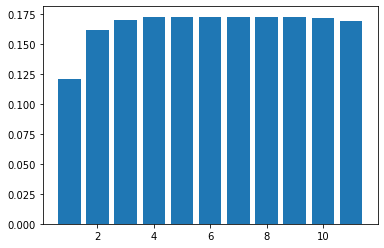

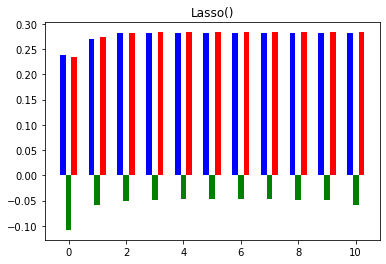

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
Ridge()


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-03-21 11:20:51] Features: 1/11 -- score: 0.12139901952816516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2023-03-21 11:20:51] Features: 2/11 -- score: 0.16127082330792775[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-03-21 11:20:51] Features: 3/11 -- score: 0.16961875617011446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don






11
1     0.121399
2     0.161271
3     0.169619
4     0.171844
5     0.172705
6     0.172708
7     0.172708
8      0.17245
9      0.17204
10    0.171228
11    0.168033
Name: avg_score, dtype: object


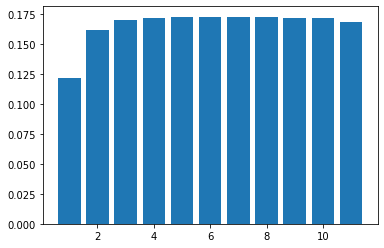

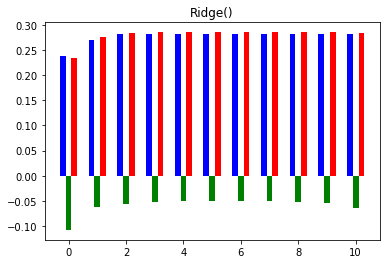

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
DecisionTreeRegressor(random_state=0)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-03-21 11:20:53] Features: 1/11 -- score: 0.1083295709173897[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2023-03-21 11:20:53] Features: 2/11 -- score: 0.20149349574945663[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-03-21 11:20:53] Features: 3/11 -- score: 0.20149349574945655[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done






11
1      0.10833
2     0.201493
3     0.201493
4     0.201493
5     0.091335
6     0.176984
7     0.173028
8     0.228687
9     0.165486
10    0.005897
11    0.120027
Name: avg_score, dtype: object


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2023-03-21 11:20:55] Features: 11/11 -- score: 0.12002693618051115

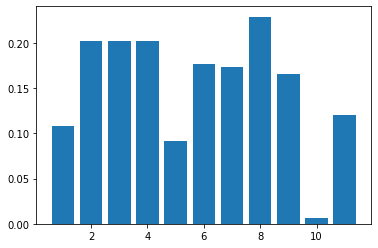

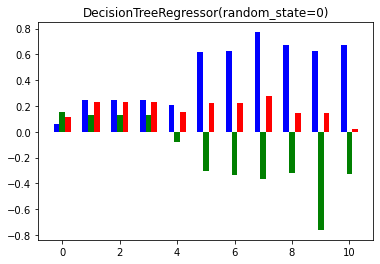

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
KNeighborsRegressor(n_neighbors=2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.2s finished

[2023-03-21 11:20:57] Features: 1/11 -- score: -0.020290920042796163[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2023-03-21 11:20:57] Features: 2/11 -- score: -0.020290920042796163[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s finished

[2023-03-21 11:20:57] Features: 3/11 -- score: -0.023505927803188015[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)






11
1    -0.020291
2    -0.020291
3    -0.023506
4     -0.13158
5    -0.186937
6    -0.145999
7    -0.200631
8    -0.251456
9    -0.304447
10   -0.304537
11   -0.304852
Name: avg_score, dtype: object


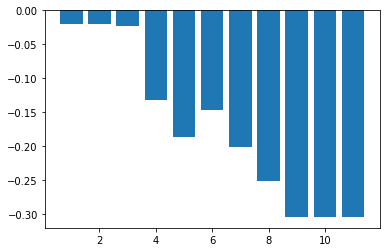

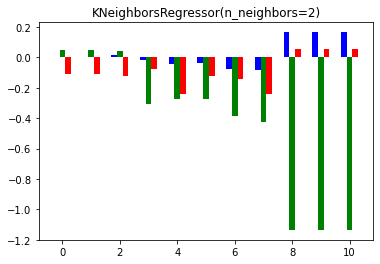

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.7s finished

[2023-03-21 11:21:06] Features: 1/11 -- score: 0.10832960340690807[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.4s finished

[2023-03-21 11:21:13] Features: 2/11 -- score: 0.20191456379721798[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.4s finished

[2023-03-21 11:21:25] Features: 3/11 -- score: 0.40720763993646836[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don






11
1      0.10833
2     0.201915
3     0.407208
4     0.409846
5     0.550008
6     0.540429
7     0.533679
8     0.524164
9     0.521614
10     0.50193
11     0.49803
Name: avg_score, dtype: object


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished

[2023-03-21 11:22:17] Features: 11/11 -- score: 0.49802991268828384

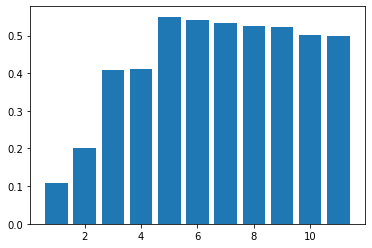

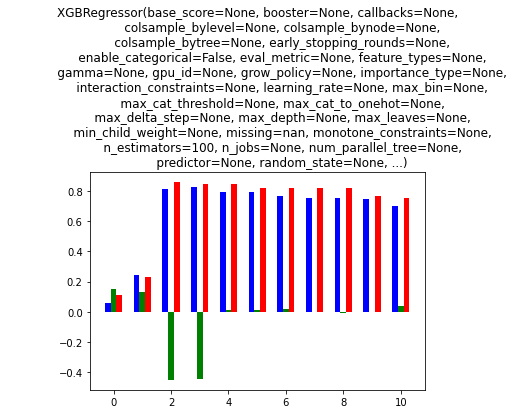

In [56]:
model_name=[linear_model.LinearRegression(),BayesianRidge(),Lasso(),Ridge(),DecisionTreeRegressor(random_state=0),KNeighborsRegressor(n_neighbors=2),XGBRegressor()]

import joblib
sys.modules['sklearn.externals.joblib']=joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
twod_attributes=[]
for i in range(0,len(model_name)):
  model=model_name[i]
  print(model)
  sfs1=SFS(model,k_features=len(x_train_1.columns),forward=True,floating=False,verbose=2,scoring='r2',cv=3)
  sfs1=sfs1.fit(x_train_1,y_train_1)
  t=sfs1.subsets_
  t=pd.DataFrame(t)
  t=t.transpose()
  scr=t['avg_score']
  print()
  print()
  print()
  print()
  print()
  print(t.shape[0])
  print(scr)
  plt.bar(np.arange(1,t.shape[0]+1),scr)
  plt.show()

  ind_scr=t['cv_scores']
  ind_scr=np.array(ind_scr)
  ind_scr_1=[]
  ind_scr_2=[]
  ind_scr_3=[]
  for i in range(0,len(ind_scr)):
    ind_scr_1.append(ind_scr[i][0])
    ind_scr_2.append(ind_scr[i][1])
    ind_scr_3.append(ind_scr[i][2])
  ax = plt.subplot(111)
  ax.bar(np.arange(t.shape[0])-0.2, ind_scr_1, width=0.2, color='b', align='center')
  ax.bar(np.arange(t.shape[0])    , ind_scr_2, width=0.2, color='g', align='center')
  ax.bar(np.arange(t.shape[0])+0.2, ind_scr_3, width=0.2, color='r', align='center')
  plt.title(model)
  plt.show()
  twod_attributes.append(t)
  for i in range(0,25):
    print('  ')

In [61]:
twod_feature_priority=[]
for i in range(0,len(twod_attributes)):
  feature_priority=[]
  for j in range(1,len(twod_attributes[i]['feature_names'])):
    list_1=twod_attributes[i]['feature_names'][j]
    list_2=twod_attributes[i]['feature_names'][j+1]
    res = [i for i in list_2 if i not in list_1]
    feature_priority.append(res)
  feature_priority.append(list(twod_attributes[i]['feature_names'][1]))
  feature_priority=feature_priority[::-1]
  feature_priority=np.array(feature_priority)
  feature_priority=feature_priority.flatten()
  twod_feature_priority.append(feature_priority)
twod_feature_priority=np.array(twod_feature_priority)  
twod_feature_priority=twod_feature_priority.transpose()

In [62]:
df_ranking_features_model=pd.DataFrame(data=twod_feature_priority,index=np.arange(len(twod_feature_priority)),columns=model_name)
df_ranking_features_model

,LinearRegression(),BayesianRidge(),Lasso(),Ridge(),DecisionTreeRegressor(random_state=0),KNeighborsRegressor(n_neighbors=2),"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=None, ...)"
0,Sales,Sales,Sales,Sales,Sub-Category,Sub-Category,Sub-Category
1,Quantity,Quantity,Quantity,Quantity,Quantity,Quantity,Segment
2,Segment,Segment,Segment,Segment,City,Ship Mode,Quantity
3,State,State,State,State,State,Sales,Region
4,Ship Mode,Ship Mode,Ship Mode,Ship Mode,Segment,State,State
5,Country,Country,City,Country,Ship Mode,Region,City
6,City,City,Country,City,Sales,Discount,Ship Mode
7,Region,Region,Region,Region,Region,Segment,Country
8,Category,Category,Category,Category,Category,City,Category
9,Sub-Category,Sub-Category,Sub-Category,Sub-Category,Country,Category,Sales


## THE COLUMNS DISCOUNT, SUB CATEGORY, CATEGORY AND REGION ARE THE ONES THAT DONOT CONTRIBUTE MUCH IN PROFIT.